In [1]:
%matplotlib inline

Analyze seqFISH data
====================



In [63]:
import scanpy as sc
import squidpy as sq

import numpy as np
import pandas as pd

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")



scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7
squidpy==1.2.2


In [75]:
# load the pre-processed dataset
adata = sq.datasets.seqfish()
adata

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'X_umap', 'spatial'

In [100]:
print(adata.X)
print(type(adata.X))

  (9, 0)	1.0
  (10, 0)	1.0
  (22, 0)	1.0
  (30, 0)	1.0
  (37, 0)	1.0
  (41, 0)	1.0
  (43, 0)	1.0
  (45, 0)	1.0
  (48, 0)	1.0
  (62, 0)	1.0
  (68, 0)	1.0
  (73, 0)	1.0
  (74, 0)	1.0
  (77, 0)	1.0
  (85, 0)	1.0
  (86, 0)	1.0
  (88, 0)	1.0
  (98, 0)	1.0
  (100, 0)	1.0
  (101, 0)	1.0
  (105, 0)	1.0
  (106, 0)	1.0
  (110, 0)	1.0
  (113, 0)	2.0
  (117, 0)	1.0
  :	:
  (19339, 350)	1.0
  (19340, 350)	1.0
  (19341, 350)	1.0
  (19346, 350)	1.0
  (19347, 350)	3.0
  (19358, 350)	1.0
  (19362, 350)	1.0
  (19364, 350)	1.0
  (19371, 350)	1.0
  (19373, 350)	1.0
  (19376, 350)	1.0
  (19381, 350)	1.0
  (19383, 350)	1.0
  (19387, 350)	1.0
  (19388, 350)	1.0
  (19390, 350)	1.0
  (19396, 350)	4.0
  (19398, 350)	1.0
  (19399, 350)	1.0
  (19400, 350)	1.0
  (19407, 350)	1.0
  (19408, 350)	2.0
  (19409, 350)	1.0
  (19413, 350)	1.0
  (19414, 350)	3.0
<class 'scipy.sparse.csc.csc_matrix'>
0.0


In [104]:
print(adata.X[1,3])

0.0


In [78]:
display(adata.obs)

,Area,celltype_mapped_refined
embryo1_Pos0_cell10_z2,10400,Low quality
embryo1_Pos0_cell10_z5,2256,Lateral plate mesoderm
embryo1_Pos0_cell100_z2,8144,Erythroid
embryo1_Pos0_cell100_z5,6592,Lateral plate mesoderm
embryo1_Pos0_cell101_z2,8560,Erythroid
...,...,...
embryo1_Pos28_cell97_z2,7552,Spinal cord
embryo1_Pos28_cell97_z5,3408,Endothelium
embryo1_Pos28_cell98_z2,12704,Spinal cord
embryo1_Pos28_cell98_z5,11376,Haematoendothelial progenitors


In [95]:
display(adata.var)

""
Abcc4
Acp5
Acvr1
Acvr2a
Adora2b
...
Wnt8a
Xist
Zfp444
Zfp57


In [83]:
print(adata.obsm)

AxisArrays with keys: X_umap, spatial


- obs: observations(cells)
- vars: variables(genes)
- uns: unstructured data (any data with information)
- obsm/varm: indexed annotations

First, let\'s visualize cluster annotation in spatial context with
`scanpy.pl.spatial`.


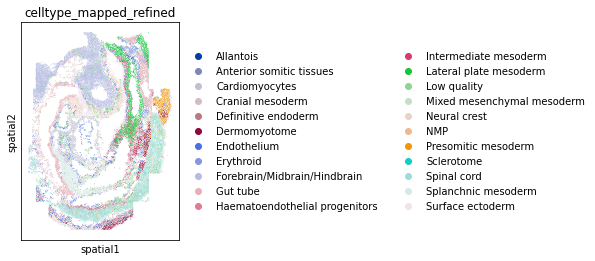

In [45]:
sc.pl.spatial(adata, color="celltype_mapped_refined", spot_size=0.03)

Neighborhood enrichment analysis
================================

- compute such score with the function: `squidpy.gr.nhood_enrichment`.  
It\'s an enrichment score on spatial proximity of clusters: if spots belonging to two different clusters are often close to each other, then they will have a high score and can be defined as being *enriched*. On the other hand, if they are far apart, the score will be low and they can be defined as *depleted*. This score is based on a permutation-based test, and you can set the number of permutations with the [n\_perms]{.title-ref} argument (default is 1000).

- compute connectivity matrix with `squidpy.gr.spatial_neighbors`.


- directly visualize the results with `squidpy.pl.nhood_enrichment`. 
We\'ll add a dendrogram to the heatmap computed with linkage method *ward*.


- annadata.Annadata.obs is used for calculating neighborhood enrichment.

In [89]:
sq.gr.spatial_neighbors(adata)

In [90]:
sq.gr.spatial_neighbors(adata)

  0%|          | 0/1000 [00:00<?, ?/s]

In [93]:
#arr = np.array(adata.uns["celltype_mapped_refined_nhood_enrichment"]["zscore"])
#arr

array([[ 3.51899330e+01, -1.66625468e+00, -4.09782447e+00,
        -3.55312981e+00, -2.22572030e+00, -3.50467996e+00,
         6.15077940e-02, -1.17670962e+00, -9.70193311e+00,
        -5.28729014e+00,  2.61832759e+00,  7.17091799e+00,
         1.93156532e+01, -3.41389952e+00,  3.03622881e+01,
        -4.72957685e+00, -1.53710108e+00, -3.36605650e+00,
        -1.40406389e+00, -7.84540170e+00, -3.32625554e+00,
         9.05841768e-01],
       [-1.65766151e+00,  2.25849823e+01, -5.29806247e+00,
         1.01414015e+01, -1.57740874e+00,  1.73771277e+01,
         1.35586823e+01, -3.01436407e+00, -1.13938209e+01,
        -6.21669613e+00,  1.63682235e+01, -1.84497274e+00,
        -6.84940543e+00, -2.93131940e+00, -4.40892752e+00,
         4.13632533e+00, -1.89743699e+00, -1.73636040e+00,
         2.65386999e+01, -7.26376786e+00, -4.82920534e+00,
        -4.66595227e+00],
       [-3.63348966e+00, -5.20866368e+00,  2.21794406e+02,
        -1.07255938e+01, -6.78405259e+00, -1.09435214e+01,
    

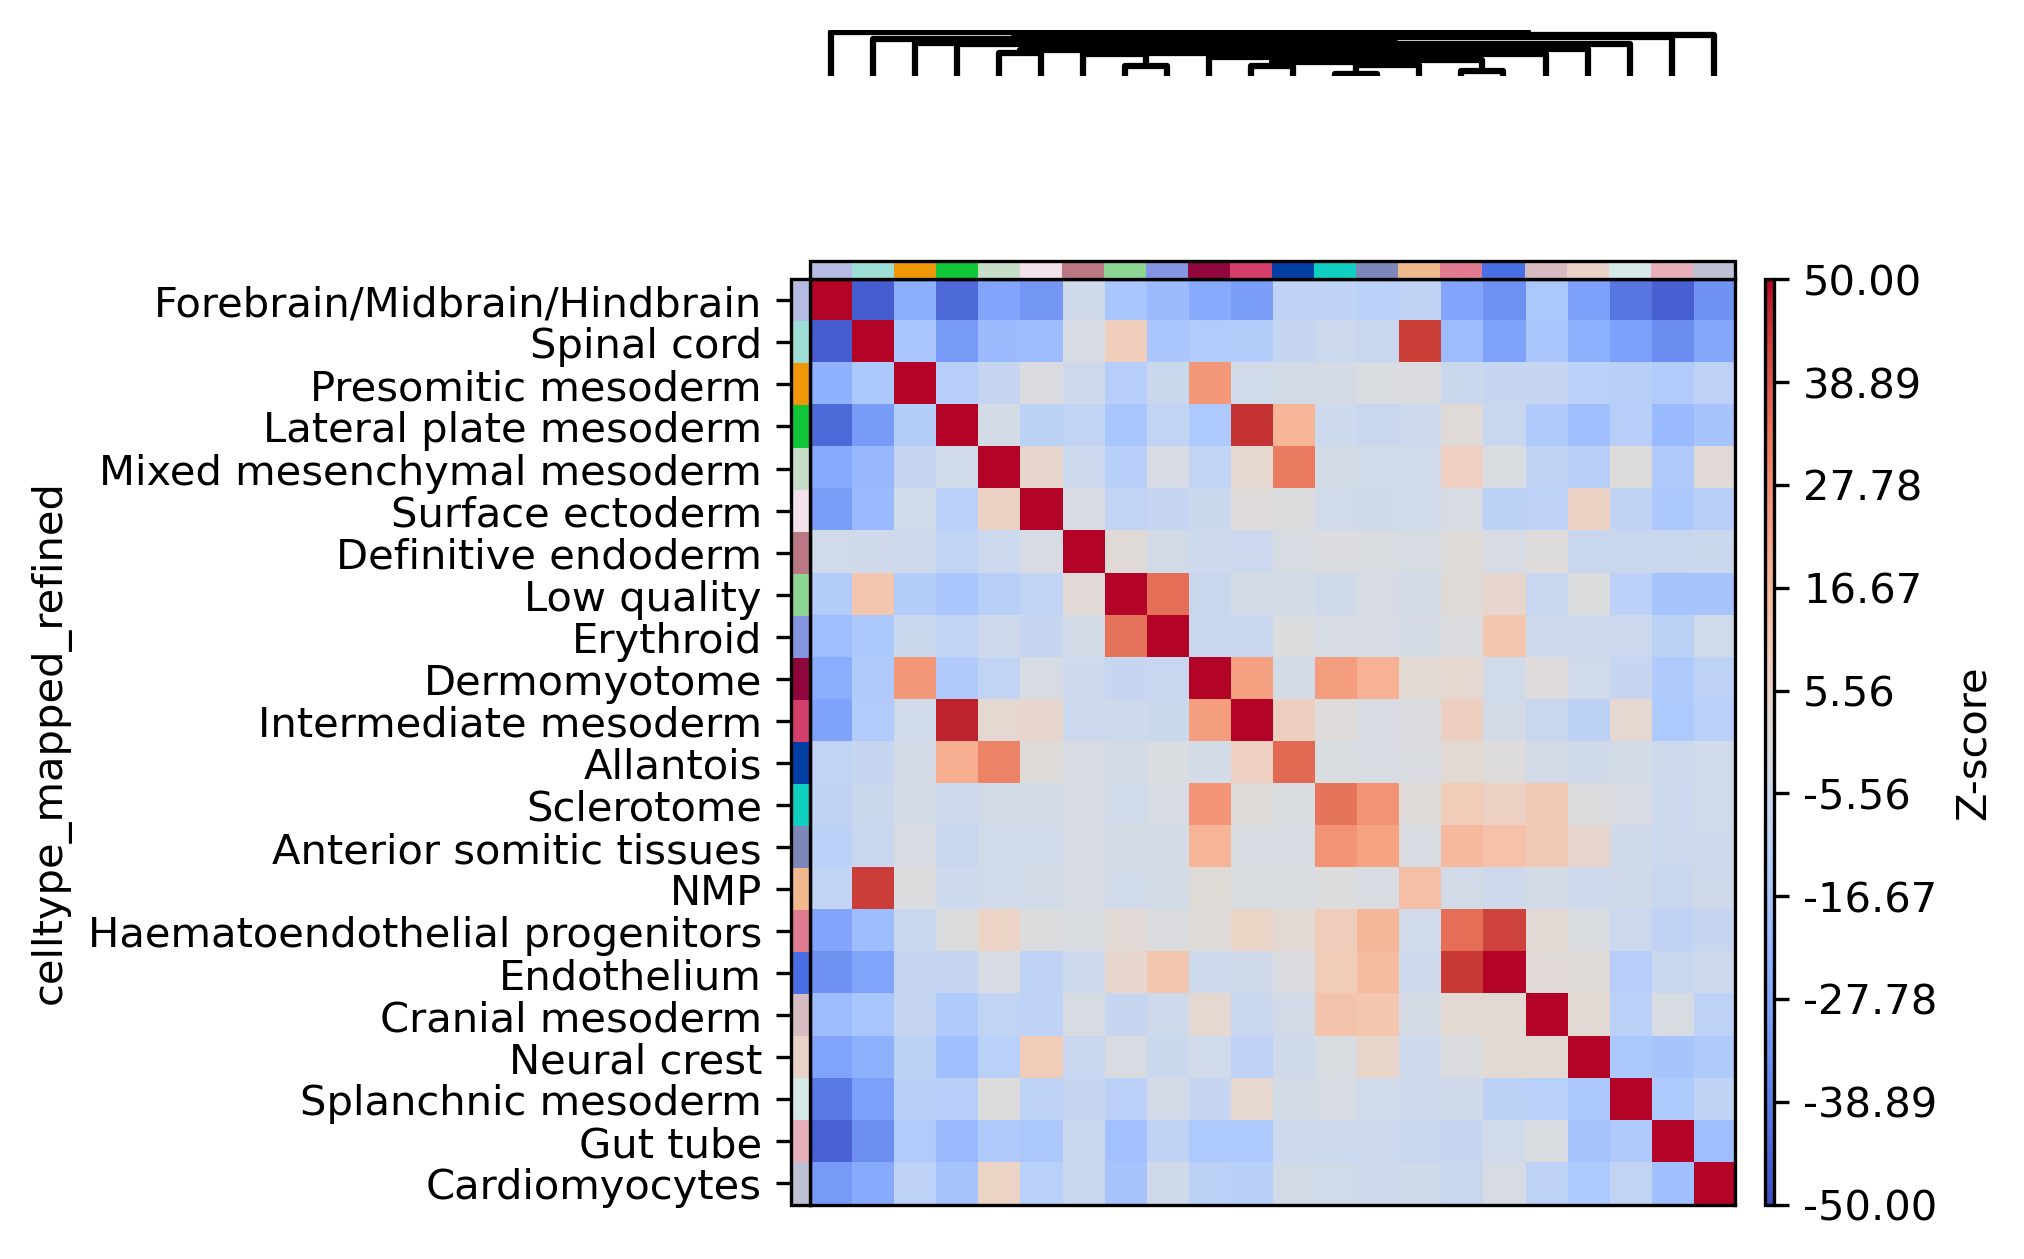

In [91]:
sq.pl.nhood_enrichment(
    adata,
    cluster_key="celltype_mapped_refined",
    cmap="coolwarm",
    title="",
    method="ward",
    dpi=300,
    figsize=(5, 4),
    save="nhod_seqfish.png",
    cbar_kwargs={"label": "Z-score"},
    vmin=-50,
    vmax=50,
)



Co-occurrence across spatial dimensions
=======================================

In addition to the neighbor enrichment score, we can visualize cluster
co-occurrence in spatial dimensions. This is a similar analysis of the
one presented above, yet it does not operate on the connectivity matrix,
but on the original spatial coordinates. The co-occurrence score is
defined as:

$$\frac{p(exp|cond)}{p(exp)}$$

where $p(exp|cond)$ is the conditional probability of observing a
cluster $exp$ conditioned on the presence of a cluster $cond$, whereas
$p(exp)$ is the probability of observing $exp$ in the radius size of
interest. The score is computed across increasing radii size around each
cell in the tissue.

We can compute this score with `squidpy.gr.co_occurrence` and set the
cluster annotation for the conditional probability with the argument
`clusters`. Then, we visualize the results with
`squidpy.pl.co_occurrence`.


  0%|          | 0/1 [00:00<?, ?/s]

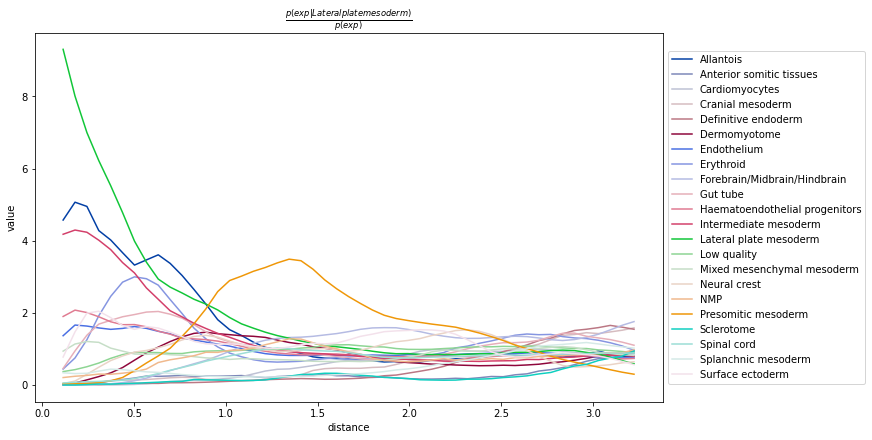

In [52]:
sq.gr.co_occurrence(adata, cluster_key="celltype_mapped_refined")
sq.pl.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
    clusters="Lateral plate mesoderm",
    figsize=(12, 6),
)

Ligand-receptor interaction analysis
====================================

The analysis showed above has provided us with quantitative information
on cellular organization and communication at the tissue level. We might
be interested in getting a list of potential candidates that might be
driving such cellular communication. This naturally translates in doing
a ligand-receptor interaction analysis. In Squidpy, we provide a fast
re-implementation the popular method CellPhoneDB `cellphonedb`
([code](https://github.com/Teichlab/cellphonedb)) and extended its
database of annotated ligand-receptor interaction pairs with the popular
database *Omnipath* `omnipath`. You can run the analysis for all
clusters pairs, and all genes (in seconds, without leaving this
notebook), with `squidpy.gr.ligrec`.

Let\'s perform the analysis and visualize the result for three clusters
of interest: *Lateral plate mesoderm*, *Intermediate mesoderm* and
*Allantois*. For the visualization, we will filter out annotations with
low-expressed genes (with the `means_range` argument) and decreasing the
threshold for the adjusted p-value (with the `alpha` argument).


In [24]:
res = sq.gr.ligrec(
    adata,
    n_perms=1000,
    cluster_key="celltype_mapped_refined",
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
)

  0%|          | 0/1000 [00:00<?, ?permutation/s]

In [25]:
res["means"].head()

cluster_1     Allantois                                          \
cluster_2     Allantois Anterior somitic tissues Cardiomyocytes   
source target                                                     
KDR    PECAM1  0.142857                 0.294237       0.150901   
IGF1   KDR     0.162338                 0.484172       0.250242   
PDGFA  KDR     0.240260                 0.562094       0.328164   
NRP1   KDR     0.532468                 0.854302       0.620372   
FGF3   FGFR3   0.324675                 0.162744       0.288913   

cluster_1                                                                    \
cluster_2     Cranial mesoderm Definitive endoderm Dermomyotome Endothelium   
source target                                                                 
KDR    PECAM1         0.233090            0.183007     0.187666    1.475811   
IGF1   KDR            0.232278            0.164777     0.246182    2.253158   
PDGFA  KDR            0.310200            0.242699     0.324104    2.331080   
NRP1   KDR            0.602408            0.534906     0.616312    2.623288   
FGF3   FGFR3          0.216180            0.467593     0.204117    0.191248   

cluster_1                                                       ...  \
cluster_2     Erythroid Forebrain/Midbrain/Hindbrain  Gut tube  ...   
source target                                                   ...   
KDR    PECAM1  0.214416                     0.160415  0.190973  ...   
IGF1   KDR     0.192922                     0.141502  0.169111  ...   
PDGFA  KDR     0.270844                     0.219424  0.247033  ...   
NRP1   KDR     0.563052                     0.511632  0.539240  ...   
FGF3   FGFR3   0.139589                     0.705757  0.270203  ...   

cluster_1           Surface ectoderm                                         \
cluster_2     Lateral plate mesoderm Low quality Mixed mesenchymal mesoderm   
source target                                                                 
KDR    PECAM1               0.271419    0.302056                   0.277021   
IGF1   KDR                  0.327692    0.292735                   0.289093   
PDGFA  KDR                  1.748416    1.713459                   1.709817   
NRP1   KDR                  0.558029    0.523072                   0.519430   
FGF3   FGFR3                0.255896    0.234674                   0.632132   

cluster_1                                                            \
cluster_2           NMP Neural crest Presomitic mesoderm Sclerotome   
source target                                                         
KDR    PECAM1  0.254229     0.318590            0.274281   0.287045   
IGF1   KDR     0.230291     0.306367            0.368467   0.286925   
PDGFA  KDR     1.651015     1.727091            1.789191   1.707649   
NRP1   KDR     0.460628     0.536704            0.598804   0.517262   
FGF3   FGFR3   0.557881     0.299989            0.268179   0.268655   

cluster_1                                                       
cluster_2     Spinal cord Splanchnic mesoderm Surface ectoderm  
source target                                                   
KDR    PECAM1    0.242653            0.235369         0.276529  
IGF1   KDR       0.251546            0.270060         0.323970  
PDGFA  KDR       1.672270            1.690784         1.744694  
NRP1   KDR       0.481883            0.500397         0.554307  
FGF3   FGFR3     0.478236            0.385616         0.393883  

[5 rows x 484 columns]

In [26]:
res["pvalues"].head()

cluster_1     Allantois                                          \
cluster_2     Allantois Anterior somitic tissues Cardiomyocytes   
source target                                                     
KDR    PECAM1     0.999                    0.951          1.000   
IGF1   KDR        1.000                    0.124          1.000   
PDGFA  KDR        0.999                    0.364          0.998   
NRP1   KDR        0.914                    0.087          0.834   
FGF3   FGFR3      0.781                    1.000          0.999   

cluster_1                                                                    \
cluster_2     Cranial mesoderm Definitive endoderm Dermomyotome Endothelium   
source target                                                                 
KDR    PECAM1            1.000               1.000        1.000         0.0   
IGF1   KDR               1.000               1.000        1.000         0.0   
PDGFA  KDR               1.000               1.000        1.000         0.0   
NRP1   KDR               0.878               0.960        0.836         0.0   
FGF3   FGFR3             1.000               0.071        1.000         1.0   

cluster_1                                                      ...  \
cluster_2     Erythroid Forebrain/Midbrain/Hindbrain Gut tube  ...   
source target                                                  ...   
KDR    PECAM1     0.999                        1.000    1.000  ...   
IGF1   KDR        1.000                        1.000    1.000  ...   
PDGFA  KDR        1.000                        1.000    1.000  ...   
NRP1   KDR        0.933                        0.995    0.982  ...   
FGF3   FGFR3      1.000                        0.000    1.000  ...   

cluster_1           Surface ectoderm                                         \
cluster_2     Lateral plate mesoderm Low quality Mixed mesenchymal mesoderm   
source target                                                                 
KDR    PECAM1                    1.0         1.0                        1.0   
IGF1   KDR                       1.0         1.0                        1.0   
PDGFA  KDR                       0.0         0.0                        0.0   
NRP1   KDR                       1.0         1.0                        1.0   
FGF3   FGFR3                     1.0         1.0                        0.0   

cluster_1                                                                     \
cluster_2        NMP Neural crest Presomitic mesoderm Sclerotome Spinal cord   
source target                                                                  
KDR    PECAM1  1.000          1.0               1.000      0.998         1.0   
IGF1   KDR     0.997          1.0               0.766      0.898         1.0   
PDGFA  KDR     0.000          0.0               0.000      0.000         0.0   
NRP1   KDR     1.000          1.0               0.995      0.993         1.0   
FGF3   FGFR3   0.009          1.0               1.000      0.978         0.0   

cluster_1                                           
cluster_2     Splanchnic mesoderm Surface ectoderm  
source target                                       
KDR    PECAM1               1.000            1.000  
IGF1   KDR                  1.000            0.990  
PDGFA  KDR                  0.000            0.000  
NRP1   KDR                  1.000            1.000  
FGF3   FGFR3                0.575            0.397  

[5 rows x 484 columns]

In [27]:
res["metadata"].head()

,,aspect_intercell_source,aspect_intercell_target,category_intercell_source,category_intercell_target,category_source_intercell_source,category_source_intercell_target,consensus_direction,consensus_inhibition,consensus_score_intercell_source,consensus_score_intercell_target,...,scope_intercell_source,scope_intercell_target,secreted_intercell_source,secreted_intercell_target,sources,transmitter_intercell_source,transmitter_intercell_target,type,uniprot_intercell_source,uniprot_intercell_target
source,target,,,,,,,,,,,,,,,,,,,,,
KDR,PECAM1,functional,functional,ligand,receptor,resource_specific,resource_specific,True,False,1,10,...,generic,generic,True,False,Wang,True,False,post_translational,P35968,P16284
IGF1,KDR,functional,functional,ligand,receptor,resource_specific,resource_specific,True,False,19,23,...,generic,generic,True,True,Wang,True,False,post_translational,P05019,P35968
PDGFA,KDR,functional,functional,ligand,receptor,resource_specific,resource_specific,True,False,18,23,...,generic,generic,True,True,Wang,True,False,post_translational,P04085,P35968
NRP1,KDR,functional,functional,ligand,receptor,resource_specific,resource_specific,True,False,2,23,...,generic,generic,True,True,BioGRID;CellChatDB-cofactors;HPRD;Wang,True,False,post_translational,O14786,P35968
FGF3,FGFR3,functional,functional,ligand,receptor,resource_specific,resource_specific,False,False,17,19,...,generic,generic,True,True,Baccin2019;CellCall;CellPhoneDB;CellTalkDB;Cel...,True,False,post_translational,P11487,P22607


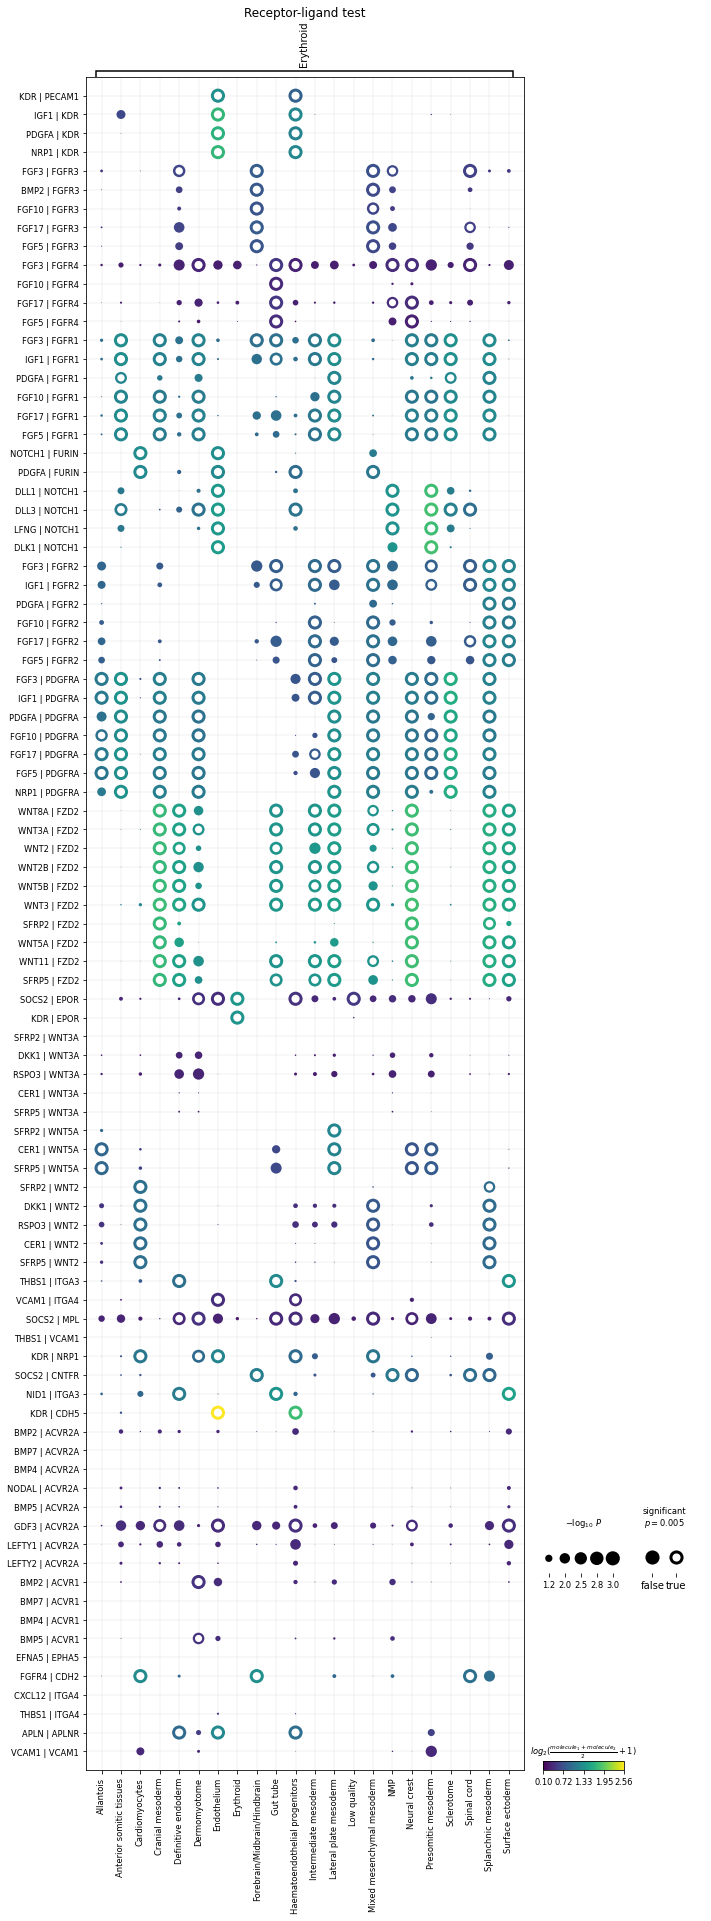

In [28]:
sq.pl.ligrec(res, source_groups="Erythroid", alpha=0.005)

The dotplot visualization provides an interesting set of candidate
interactions that could be involved in the tissue organization of the
cell types of interest. It should be noted that this method is a pure
re-implementation of the original permutation-based test, and therefore
retains all its caveats and should be interpreted accordingly.


Analyze Ripley’s L function
====================
- compute the Ripley’s L function.  
The Ripley’s L function is a descriptive statistics generally used to determine whether points have a random, dispersed or clustered distribution pattern at certain scale. The Ripley’s L is a variance-normalized version of the Ripley’s K statistic.




![title](practicum/Unknown.png)

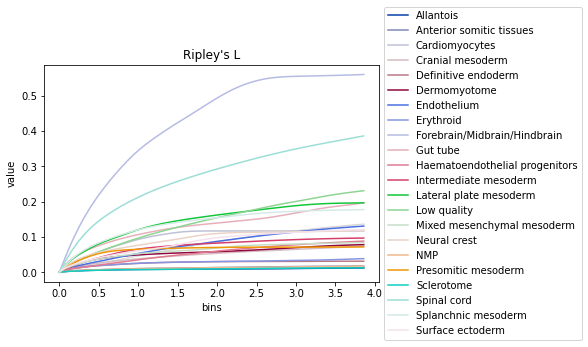

In [94]:
mode = "L"
sq.gr.ripley(adata, cluster_key="celltype_mapped_refined", mode=mode)
sq.pl.ripley(adata, cluster_key="celltype_mapped_refined", mode=mode)

Analyze visium_hne_adata data
====================

Compute Moran’s I score
- how to compute the Moran’s I global spatial auto-correlation statistics
- The Moran’s I global spatial auto-correlation statistics evaluates whether features (i.e. genes) shows a pattern that is clustered, dispersed or random in the tissue are under consideration.


In [29]:
adata1 = sq.datasets.visium_hne_adata()
adata1

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [34]:
# subset the number of genes to evaluate
#genes = adata1[:, adata1.var.highly_variable].var_names.values[:100]
#genes

array(['Oprk1', 'St18', '3110035E14Rik', '1700034P13Rik', 'Sgk3',
       'A830018L16Rik', 'Sulf1', 'Trpa1', 'Rdh10', 'Ube2w', 'Jph1',
       'Efhc1', 'Kcnq5', 'Gm29107', 'Ogfrl1', 'B3gat2', 'Col9a1',
       'Adgrb3', 'Cfc1', 'Amer3', 'Arhgef4', 'Lman2l', '2010300C02Rik',
       'Lyg2', 'Nms', 'Creg2', 'Rfx8', 'Il1r2', 'Il1r1', 'Il1rl1',
       'Il18rap', 'Slc9a4', 'Slc9a2', 'Tmem182', 'Pantr1', 'Fhl2',
       '1500015O10Rik', 'Gm29157', 'Col3a1', 'Col5a2', 'Slc39a10',
       'Tmeff2', 'Stat4', 'Gls', 'Plcl1', 'Satb2', 'Aox1', 'Aox3',
       'Cflar', 'Tmem237', 'Cdk15', 'Gm973', 'Ica1l', 'Nrp2', 'Gm4208',
       'Zdbf2', 'Gm39653', 'Fzd5', 'D630023F18Rik', 'Myl1', 'Lancl1',
       'Spag16', 'Fn1', 'Igfbp2', 'Igfbp5', 'Arpc2', 'Tmbim1', 'Catip',
       'Vil1', 'Wnt6', 'Wnt10a', 'Cfap65', 'Zfand2b', 'Glb1l', 'Tuba4a',
       'Ptprn', 'Resp18', 'Des', 'Speg', 'Asic4', 'Chpf', 'Tmem198',
       'Epha4', 'Pax3', 'Sgpp2', 'Kcne4', 'Scg2', 'Dock10', 'Col4a3',
       'Daw1', 'Sphkap', 'Pid1', '

In [30]:
genes = adata1[:, adata1.var.highly_variable].var_names.values[:100]

sq.gr.spatial_neighbors(adata1)
sq.gr.spatial_autocorr(
    adata1,
    mode="moran",
    genes=genes,
    n_perms=100,
    n_jobs=1,
)
adata1.uns["moranI"].head(10)

  0%|          | 0/100 [00:00<?, ?/s]

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
3110035E14Rik,0.665132,0.0,0.000131,0.0,0.009901,0.000209,0.0,0.0,0.012074
Resp18,0.649582,0.0,0.000131,0.0,0.009901,0.000247,0.0,0.0,0.012074
1500015O10Rik,0.605940,0.0,0.000131,0.0,0.009901,0.000131,0.0,0.0,0.012074
Ecel1,0.570304,0.0,0.000131,0.0,0.009901,0.000193,0.0,0.0,0.012074
2010300C02Rik,0.539469,0.0,0.000131,0.0,0.009901,0.000163,0.0,0.0,0.012074
Scg2,0.476060,0.0,0.000131,0.0,0.009901,0.000194,0.0,0.0,0.012074
Ogfrl1,0.457945,0.0,0.000131,0.0,0.009901,0.000187,0.0,0.0,0.012074
Itm2c,0.451842,0.0,0.000131,0.0,0.009901,0.000169,0.0,0.0,0.012074
Tuba4a,0.451810,0.0,0.000131,0.0,0.009901,0.000202,0.0,0.0,0.012074
Satb2,0.429162,0.0,0.000131,0.0,0.009901,0.000178,0.0,0.0,0.012074


Compute Sepal score
- how to compute the Sepal score for spatially variable genes identification.
- The Sepal score is a method that simulates a diffusion process to quantify spatial structure in tissue. 

In [33]:
sq.gr.spatial_neighbors(adata1)

genes = adata1.var_names[(adata1.var.n_cells > 100) & adata1.var.highly_variable][0:100]
sq.gr.sepal(adata1, max_neighs=6, genes=genes, n_jobs=1)
adata1.uns["sepal_score"].head(10)

  0%|          | 0/100 [00:00<?, ?/s]

,sepal_score
Lct,7.844
1500015O10Rik,6.990
Ecel1,5.283
Fzd5,4.638
Cfap65,4.095
C1ql2,3.183
Slc9a2,2.978
Gm17634,2.868
St18,2.540
Des,2.473
